In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
import random

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn import ensemble

from itertools import cycle
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, balanced_accuracy_score, auc, roc_curve

In [ ]:
list999 = []
list88 = []
elselist = []
column_feature = []
accuracy = [] 
count0 = [] 
count1 = []


def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)


# # 혈액검사 변수
# column_name_gb = ['HE_BMI']
# column_name_choice1 = ['HE_WBC', 'HE_RBC', 'HE_Bplt', 'HE_Uacid', 'HE_glu', 'HE_sbp', 'HE_dbp', 'HE_HbA1c', 'BE3_76', 'BE3_86', 'HE_TG', 'HE_ast', 'HE_alt', 'HE_HB']
# column_name_6079 = ['HE_glu', 'HE_HbA1c', 'HE_alt', 'HE_TG', 'HE_RBC', 'HE_Uacid', 'HE_HB', 'HE_WBC', 'BE3_86', 'HE_ast']
# column_name_1939 = ['HE_alt', 'HE_Uacid', 'HE_sbp', 'HE_glu', 'HE_TG', 'HE_HbA1c', 'HE_dbp', 'BE3_76', 'HE_WBC', 'HE_Bplt']
# column_name_4059 = ['HE_TG', 'HE_alt', 'HE_glu', 'HE_Uacid', 'HE_HbA1c', 'HE_dbp', 'HE_sbp', 'HE_RBC', 'HE_WBC', 'HE_HB']
# ######## 
# column_name_group = ['HE_BMI'] + column_name_choice1

# # for c_name in column_name_gb + column_name_choice1 + column_name_6079 + column_name_1939 + column_name_4059:
# #        if c_name not in column_name_group:
# #          column_name_group.append(c_name)

# # 아래에서 BMI를 기준으로 정렬하고, BMI를 제거하기 때문에 각 그룹별로 보기 위해서는 + ['HE_BMI'] 부분이 들어가야함.
# column_feature = [column_name_gb + column_name_choice1,
#                   column_name_gb + column_name_6079,
#                   column_name_gb + column_name_1939,
#                   column_name_gb + column_name_4059]

# print_name = ['choice1', 5979, 1939, 3959]
# cl = len(column_feature)

In [ ]:
iter = 0
iteration_test = []
ii = 0
BMI_grade = []
sup = "_SMOTE"
PATH = "Binary_ANN_Result_relu" + sup
import os
os.makedirs(PATH,exist_ok=True)

for top_count in [4,5,6,7,8]:
    print_list = []
    ct = 0
    for ii in [1,2]: # sex
        data = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
        data2 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
        data3 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
        data4 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)
        
        gender = data['sex']
        gender2 = data2['sex']
        gender3 = data3['sex']
        gender4 = data4['sex']
        
        age_list = [[19, 39], [39, 59], [59, 79]]
        for age in range(len(age_list)): 
            
            data_copy = data[(data['age']>=age_list[age][0]) & (data['age']<age_list[age][1])].copy()
            data2_copy = data2[(data2['age']>=age_list[age][0]) & (data2['age']<age_list[age][1])].copy()
            data3_copy = data3[(data3['age']>=age_list[age][0]) & (data3['age']<age_list[age][1])].copy()
            data4_copy = data4[(data4['age']>=age_list[age][0]) & (data4['age']<age_list[age][1])].copy()
            
            sex = [ii]
            data_copy = data_copy.loc[gender.isin(sex)]
            data2_copy = data2_copy.loc[gender2.isin(sex)]
            data3_copy = data3_copy.loc[gender3.isin(sex)]
            data4_copy = data4_copy.loc[gender4.isin(sex)]
            
            Feature_Selection = pd.read_csv('RFC_Feature_Selection/RFC_feature_selection_Multiclass_OverSampling.csv', index_col = 0)
            filtering = Feature_Selection[(Feature_Selection['gender'] == ii) & (Feature_Selection['age'] == str(age_list[age]))]
            column_feature = ['HE_BMI'] + list(filtering.index[0:top_count])
            
            
            data_select = data_copy[column_feature].copy()
            data_select2 = data2_copy[column_feature].copy()
            data_select3 = data3_copy[column_feature].copy()
            data_select4 = data4_copy[column_feature].copy()
            for i in range(len(column_feature)):
                BMI_grade.append([])
                ## 숫자로 바꿔주는 코드임.
                data_select[column_feature[i]] = pd.to_numeric(data_select[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select2[column_feature[i]] = pd.to_numeric(data_select2[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select3[column_feature[i]] = pd.to_numeric(data_select3[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select4[column_feature[i]] = pd.to_numeric(data_select4[column_feature[i]], errors='coerce').astype(float).round(2)            #print(len(df)) #16000개
                

            df1 = data_select[column_feature]
            df2 = data_select2[column_feature]
            df3 = data_select3[column_feature]
            df4 = data_select4[column_feature]
            
            df = pd.concat([df1, df2, df3, df4], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
            df = df.dropna(how = 'any')
            df = df.sort_values(by = 'HE_BMI')
            for i in range(len(column_feature)):
                ### 8,9제거
                if column_feature[i] in list999:
                    df.drop(df[(df[column_feature[i]] == 888) | (df[column_feature[i]] == 999)].index, inplace = True)
                elif column_feature[i] in list88:
                    df.drop(df[(df[column_feature[i]] == 88) | (df[column_feature[i]] == 99)].index, inplace = True)
                else:
                    df.drop(df[(df[column_feature[i]] == 8) | (df[column_feature[i]] == 9)].index, inplace = True)
                    
            BMI_tmp = df['HE_BMI']
            for k in range(len(df)):
                # print(i+cl*(ii-1)+len(age_list)*(age))
                if BMI_tmp.iloc[k] < 23:
                    BMI_grade[iter].append(0)
                elif 23 <= BMI_tmp.iloc[k]:
                    BMI_grade[iter].append(1)
            tree_data = df.drop(['HE_BMI'],axis = 1)
            
            
            iteration_test.append([iter,ct])
            if tree_data.empty == False:
                #########################################################
                # data normalizaion
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(tree_data)
                tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
                tree_data['BMI_grade'] = BMI_grade[iter]
                
                # from sklearn.preprocessing import label_binarize
                # y = label_binarize(y, classes=[0, 1, 2])
                # n_classes = y.shape[1]
                
                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                # y = y.squeeze()
                
                y = label_binarize(y, classes=[0, 1])
                n_classes = y.shape[1]

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


                # #######################
                # ###### MANUALLY #######
                # #######################
                
                # from collections import Counter
                # cnt_list = []
                # for i2 in range(len(y_train)):
                #     cnt_list.append(np.where(1 == y_train[i2])[0][0])
                # cnt2 = cnt_list.count(2)
                # cnt1 = cnt_list.count(1)
                # cnt0 = cnt_list.count(0)
                
                # cnt_max = max(cnt0,cnt1,cnt2)
                
                # dsas = pd.DataFrame({'0' : np.zeros(len(y_train)), '1' : np.zeros(len(y_train)), '2' : np.zeros(len(y_train))})
                # dsas[['0', '1', '2']] = y_train
                # dsas = dsas.set_index(X_train.index)
                # train_ = pd.concat([X_train, dsas], axis=1)
              
                # n_resampl_0 = cnt_max - cnt0
                # if n_resampl_0 != 0:
                #     local = train_.loc[(train_['0']==1)] #0인 갯수가 부족하니까 그것들을 추출
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_0)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_1 = cnt_max - cnt1
                # if n_resampl_1 != 0:
                #     local = train_.loc[(train_['1']==1)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_1)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_2 = cnt_max - cnt2
                # if n_resampl_2 != 0:
                #     local = train_.loc[(train_['2']==1)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_2)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # X_train = train_.iloc[:,:-3]
                # y_train = train_.iloc[:,-3:]
                
                # y_train = y_train.values.tolist()
                # y_train = np.array(y_train)

                
                ###############
                ### SMOTE #####
                ###############
                
                sm = SMOTE(random_state=42)
                X_train, y_train = sm.fit_resample(X_train, y_train)
                
                
                from collections import Counter
                cnt_dict = dict(Counter(y_train))
                
                cnt0 = cnt_dict[0]
                cnt1 = cnt_dict[1]
                print('after augmentation')
                print(cnt0, cnt1)#, cnt2)
                print('------------------')
                    
                ##########################################################
                
                ### Neural Network 구성
                clf1 = MLPClassifier(random_state=1, max_iter=10000, activation='relu',hidden_layer_sizes=[100, 100])
                clf1.fit(X_train,y_train)
                
                parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1]}
                grid_dtree1 = GridSearchCV(clf1,param_grid=parameters,cv=3,refit=True)
                grid_dtree1.fit(X_train,y_train)
                best_param1 = list(grid_dtree1.best_params_.values())
                
                clf = MLPClassifier(random_state=1, max_iter=1000, activation='relu',hidden_layer_sizes=[100, 100],alpha= best_param1[0])
                clf.fit(X_train,y_train)    
            
            
                
                y_pred = clf.predict(X_test) 
                r_score = recall_score(y_test, y_pred)
                p_score = precision_score(y_test, y_pred)
                f_score = f1_score(y_test, y_pred)
                accuracy = clf.score(X_test,y_test)
                TP = perf_measure(np.array(y_test), y_pred)[0]
                FP = perf_measure(np.array(y_test), y_pred)[1]
                TN = perf_measure(np.array(y_test), y_pred)[2]
                FN = perf_measure(np.array(y_test), y_pred)[3]
                #print(str(ii) + ' ' + str(age_list[age]) + ' ' + str(i+1) + 'th group')
                
                print_list.append([])
                print_list[ct].append(str(sex))
                print_list[ct].append(str(age_list[age]))
                # print_list[ct].append(str(print_name[i]) + "th_group")
                print_list[ct].append(str(column_feature))
                print_list[ct].append(str(cnt0))
                print_list[ct].append(str(cnt1))
                
                # print_list[ct].append(str(train_data_size))
                # print_list[ct].append(str(test_data_size))
                
                print_list[ct].append(TP)
                print_list[ct].append(FP)
                print_list[ct].append(TN)
                print_list[ct].append(FN)
                print_list[ct].append(np.round(accuracy,3))
                print_list[ct].append(np.round(r_score,3))
                print_list[ct].append(np.round(p_score,3))
                print_list[ct].append(np.round(f_score,3))
                
                fpr,tpr, threshold = roc_curve(y_test,clf.predict_proba(X_test)[:, 1])
                plt.figure()
                plt.plot(fpr,tpr,label = "roc curve")
                plt.xlabel("FPR")
                plt.ylabel("TPR")

                plt.legend(loc = 4)
                plt.fill_between(fpr,tpr, alpha=0.5)
                clf_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
                plt.text(0.65,0.2,"AUC score: {:.3f}".format(clf_auc))
                plt.title('top ' + str(top_count) + ' ' + str(ii) + ' ' + str(sex[0]) + ' '+ str(best_param1[0]) + ' ANN')
                plt.savefig(PATH + '/top ' + str(top_count)
                            + ' ' + str(ii) + ' ' + str(age_list[age])
                            + ' ' + str(i+1) +  sup + '.png')
                plt.close()
                    
                from sklearn.model_selection import cross_val_predict
                from sklearn.metrics import confusion_matrix
                y_train_pred = cross_val_predict(clf, X_train, y_train)
                conf_mx = confusion_matrix(y_train, y_train_pred)
                plt.matshow(conf_mx, cmap=plt.cm.gray)
                plt.savefig(PATH +"/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' confusion-matrix' + sup + '.png')
                
                ct += 1
                    
            elif cnt1 * cnt0 == 0:
                print('확인해야함!!')
                print(column_feature[i])
                
            iter += 1
            
            

    pl = pd.DataFrame(print_list,
                        columns=['gender',
                                '<= age <',
                                # "group",
                                "list",
                                'Number Of 0',
                                'Number of 1',
                                'TP',
                                'FP',
                                'TN',
                                'FN',
                                'accuracy score',
                                'recall score',
                                'precision score',
                                'f1 score'])

    pl.to_csv(PATH + '/top ' + str(top_count) + ' ANN_혈액검사 데이터' + sup + '.csv', index=False)

Multilabel

In [ ]:
iter = 0
iteration_test = []
BMI_grade = []
ii = 0
# top_count = 4
sup = "_auto_SMOTE_relu"
PATH = "Multiclass_ANN_Result" + sup
import os
os.makedirs(PATH,exist_ok=True)
for top_count in [4,5,6,7,8]:
    print_list = []
    ct = 0
    for ii in [1,2]: # sex
        data = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
        data2 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
        data3 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
        data4 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)
        
        gender = data['sex']
        gender2 = data2['sex']
        gender3 = data3['sex']
        gender4 = data4['sex']
        
        age_list = [[19, 39], [39, 59], [59, 79]]
        for age in range(len(age_list)): 
            
            data_copy = data[(data['age']>=age_list[age][0]) & (data['age']<age_list[age][1])].copy()
            data2_copy = data2[(data2['age']>=age_list[age][0]) & (data2['age']<age_list[age][1])].copy()
            data3_copy = data3[(data3['age']>=age_list[age][0]) & (data3['age']<age_list[age][1])].copy()
            data4_copy = data4[(data4['age']>=age_list[age][0]) & (data4['age']<age_list[age][1])].copy()
            
            sex = [ii]
            data_copy = data_copy.loc[gender.isin(sex)]
            data2_copy = data2_copy.loc[gender2.isin(sex)]
            data3_copy = data3_copy.loc[gender3.isin(sex)]
            data4_copy = data4_copy.loc[gender4.isin(sex)]
            
            Feature_Selection = pd.read_csv('RFC_Feature_Selection/RFC_feature_selection_Multiclass_OverSampling.csv', index_col = 0)
            filtering = Feature_Selection[(Feature_Selection['gender'] == ii) & (Feature_Selection['age'] == str(age_list[age]))]
            column_feature = ['HE_BMI'] + list(filtering.index[0:top_count])
            
            
            data_select = data_copy[column_feature].copy()
            data_select2 = data2_copy[column_feature].copy()
            data_select3 = data3_copy[column_feature].copy()
            data_select4 = data4_copy[column_feature].copy()
            for i in range(len(column_feature)):
                BMI_grade.append([])
                ## 숫자로 바꿔주는 코드임.
                data_select[column_feature[i]] = pd.to_numeric(data_select[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select2[column_feature[i]] = pd.to_numeric(data_select2[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select3[column_feature[i]] = pd.to_numeric(data_select3[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select4[column_feature[i]] = pd.to_numeric(data_select4[column_feature[i]], errors='coerce').astype(float).round(2)            #print(len(df)) #16000개
                

            df1 = data_select[column_feature]
            df2 = data_select2[column_feature]
            df3 = data_select3[column_feature]
            df4 = data_select4[column_feature]
            
            df = pd.concat([df1, df2, df3, df4], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
            df = df.dropna(how = 'any')
            df = df.sort_values(by = 'HE_BMI')
            for i in range(len(column_feature)):
                ### 8,9제거
                if column_feature[i] in list999:
                    df.drop(df[(df[column_feature[i]] == 888) | (df[column_feature[i]] == 999)].index, inplace = True)
                elif column_feature[i] in list88:
                    df.drop(df[(df[column_feature[i]] == 88) | (df[column_feature[i]] == 99)].index, inplace = True)
                else:
                    df.drop(df[(df[column_feature[i]] == 8) | (df[column_feature[i]] == 9)].index, inplace = True)
                    
            BMI_tmp = df['HE_BMI']
            for k in range(len(df)):
                # print(i+cl*(ii-1)+len(age_list)*(age))
                if BMI_tmp.iloc[k] < 23:
                    BMI_grade[iter].append(0)
                elif 23 <= BMI_tmp.iloc[k] < 25:
                    BMI_grade[iter].append(1)
                elif 25 <= BMI_tmp.iloc[k]:
                    BMI_grade[iter].append(2)
            tree_data = df.drop(['HE_BMI'],axis = 1)
            
            
            iteration_test.append([iter,ct])
            if tree_data.empty == False:
                #########################################################
                # data normalizaion
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(tree_data)
                tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
                tree_data['BMI_grade'] = BMI_grade[iter]
                
                # from sklearn.preprocessing import label_binarize
                # y = label_binarize(y, classes=[0, 1, 2])
                # n_classes = y.shape[1]
                
                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                # y = y.squeeze()
                
                y = label_binarize(y, classes=[0, 1, 2])
                n_classes = y.shape[1]

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


                # #######################
                # ###### MANUALLY #######
                # #######################
                
                # from collections import Counter
                # cnt_list = []
                # for i2 in range(len(y_train)):
                #     cnt_list.append(np.where(1 == y_train[i2])[0][0])
                # cnt2 = cnt_list.count(2)
                # cnt1 = cnt_list.count(1)
                # cnt0 = cnt_list.count(0)
                
                # cnt_max = max(cnt0,cnt1,cnt2)
                
                # dsas = pd.DataFrame({'0' : np.zeros(len(y_train)), '1' : np.zeros(len(y_train)), '2' : np.zeros(len(y_train))})
                # dsas[['0', '1', '2']] = y_train
                # dsas = dsas.set_index(X_train.index)
                # train_ = pd.concat([X_train, dsas], axis=1)
              
                # n_resampl_0 = cnt_max - cnt0
                # if n_resampl_0 != 0:
                #     local = train_.loc[(train_['0']==1)] #0인 갯수가 부족하니까 그것들을 추출
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_0)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_1 = cnt_max - cnt1
                # if n_resampl_1 != 0:
                #     local = train_.loc[(train_['1']==1)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_1)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_2 = cnt_max - cnt2
                # if n_resampl_2 != 0:
                #     local = train_.loc[(train_['2']==1)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_2)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # X_train = train_.iloc[:,:-3]
                # y_train = train_.iloc[:,-3:]
                
                # y_train = y_train.values.tolist()
                # y_train = np.array(y_train)

                
                ###############
                ### SMOTE #####
                ###############
                
                sm = SMOTE(random_state=42)
                X_train, y_train = sm.fit_resample(X_train, y_train)
                
                cnt_list = []
                for i2 in range(len(y_train)):
                    cnt_list.append(np.where(1 == y_train[i2])[0][0])
                cnt2 = cnt_list.count(2)
                cnt1 = cnt_list.count(1)
                cnt0 = cnt_list.count(0)
                print('after augmentation')
                print(cnt0, cnt1, cnt2)
                print('------------------')
                
                ##########################################################
                
                ### Neural Network 구성
                clf1 = MLPClassifier(random_state=1, max_iter=10000, activation='relu',hidden_layer_sizes=[100, 100])
                clf1.fit(X_train,y_train)
                
                parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1]}
                grid_dtree1 = GridSearchCV(clf1,param_grid=parameters,cv=3,refit=True)
                grid_dtree1.fit(X_train,y_train)
                best_param1 = list(grid_dtree1.best_params_.values())
                
                clf = MLPClassifier(random_state=1, max_iter=10000, activation='relu',hidden_layer_sizes=[100, 100],alpha= best_param1[0])
                clf.fit(X_train,y_train)    
                
                y_pred = clf.predict(X_test) 
                r_score = recall_score(y_test, y_pred, average = 'weighted')
                p_score = precision_score(y_test, y_pred, average = 'weighted')
                f_score = f1_score(y_test, y_pred, average = 'weighted')
                accuracy = clf.score(X_test,y_test)#, average = None)
                
                
                print(r_score)
                print(p_score)
                print(f_score)
                print(accuracy)
                
                print_list.append([])
                print_list[ct].append(str(sex))
                print_list[ct].append(str(age_list[age]))
                # print_list[ct].append(str(print_name[i]) + "th_group")
                print_list[ct].append(str(column_feature))
                print_list[ct].append(str(cnt0))
                print_list[ct].append(str(cnt1))
                print_list[ct].append(str(cnt2))
                
                # print_list[ct].append(str(train_data_size))
                # print_list[ct].append(str(test_data_size))
                
                # print_list[ct].append(TP)
                # print_list[ct].append(FP)
                # print_list[ct].append(TN)
                # print_list[ct].append(FN)
                print_list[ct].append(np.round(accuracy,3))
                print_list[ct].append(np.round(r_score,3))
                print_list[ct].append(np.round(p_score,3))
                print_list[ct].append(np.round(f_score,3))
                
                from sklearn.metrics import auc
                # Compute ROC curve and ROC area for each class
                fpr = dict()
                tpr = dict()
                roc_auc = dict()
                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], clf.predict_proba(X_test)[:, 1])
                    roc_auc[i] = auc(fpr[i], tpr[i])
                
                # Compute micro-average ROC curve and ROC area
                fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), clf.predict_proba(X_test).ravel())
                roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

                # plt.figure()
                lw = 2

                
                # First aggregate all false positive rates
                all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

                # Then interpolate all ROC curves at this points
                mean_tpr = np.zeros_like(all_fpr)
                for i in range(n_classes):
                    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

                # Finally average it and compute AUC
                mean_tpr /= n_classes

                fpr["macro"] = all_fpr
                tpr["macro"] = mean_tpr
                roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

                # Plot all ROC curves
                plt.figure(figsize=(9,9))
                plt.plot(
                    fpr["micro"],
                    tpr["micro"],
                    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
                    color="deeppink",
                    linestyle=":",
                    linewidth=4,
                )

                plt.plot(
                    fpr["macro"],
                    tpr["macro"],
                    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
                    color="navy",
                    linestyle=":",
                    linewidth=4,
                )

                from itertools import cycle
                colors = cycle(["aqua", "darkorange", "cornflowerblue"])
                for i, color in zip(range(n_classes), colors):
                    plt.plot(
                        fpr[i],
                        tpr[i],
                        color=color,
                        lw=lw,
                        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
                    )

                plt.plot([0, 1], [0, 1], "k--", lw=lw)
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel("False Positive Rate", fontsize=20)
                plt.ylabel("True Positive Rate", fontsize=20)
                plt.title("Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' Multiclass ROC', fontsize=20)
                plt.legend(loc="lower right", fontsize=15)
                plt.savefig(PATH + "/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' ROC-CURVE.png')
                plt.show()
                
                y_prob = clf.predict_proba(X_test).ravel()
                macro_roc_auc_ovo = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovo", average="macro")
                weighted_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="weighted"
                )
                micro_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="micro"
                )
                macro_roc_auc_ovr = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovr", average="macro")
                weighted_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="weighted"
                )
                micro_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="micro"
                )
                print(
                    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
                )
                print(
                    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
                )
                
                print_list[ct].append(np.round(macro_roc_auc_ovo,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovo,3))
                print_list[ct].append(np.round(macro_roc_auc_ovr,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovr,3))
                
                ct += 1
                
            iter += 1
            
            
    pl = pd.DataFrame(print_list,
                        columns=['gender',
                                '<= age <',
                                # "group",
                                "list",
                                'Number Of 0',
                                'Number of 1',
                                'Number of 2',
                                'accuracy score',
                                'recall score',
                                'precision score',
                                'f1 score',
                                'OVO AUC macro',
                                'OVO AUC micro',
                                'OVO AUC weighted',
                                'OVR AUC macro',
                                'OVR AUC micro',
                                'OVR AUC weighted'])

    pl.to_csv(PATH + '/top ' + str(top_count) + ' ANN_혈액검사 데이터' + sup + '.csv', index=False)

In [ ]:
iter = 0
iteration_test = []
BMI_grade = []
ii = 0
# top_count = 4
sup = "_auto_SMOTE_relu"
PATH = "Multiclass_ANN_no_gender" + sup
import os
os.makedirs(PATH,exist_ok=True)
for top_count in [4,5,6,7,8]:
    print_list = []
    ct = 0
    for ii in [1]:#,2]: # sex
        data = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
        data2 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
        data3 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
        data4 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)
        
        # gender = data['sex']
        # gender2 = data2['sex']
        # gender3 = data3['sex']
        # gender4 = data4['sex']
        
        age_list = [[19, 39], [39, 59], [59, 79]]
        for age in range(len(age_list)): 
            
            data_copy = data[(data['age']>=age_list[age][0]) & (data['age']<age_list[age][1])].copy()
            data2_copy = data2[(data2['age']>=age_list[age][0]) & (data2['age']<age_list[age][1])].copy()
            data3_copy = data3[(data3['age']>=age_list[age][0]) & (data3['age']<age_list[age][1])].copy()
            data4_copy = data4[(data4['age']>=age_list[age][0]) & (data4['age']<age_list[age][1])].copy()
            
            # sex = [ii]
            # data_copy = data_copy.loc[gender.isin(sex)]
            # data2_copy = data2_copy.loc[gender2.isin(sex)]
            # data3_copy = data3_copy.loc[gender3.isin(sex)]
            # data4_copy = data4_copy.loc[gender4.isin(sex)]
            
            Feature_Selection = pd.read_csv('RFC_Feature_Selection/RFC_feature_selection_Multiclass_OverSampling_No_gender.csv', index_col = 0)
            filtering = Feature_Selection[(Feature_Selection['age'] == str(age_list[age]))]
            column_feature = ['HE_BMI'] + list(filtering.index[0:top_count])
            
            
            data_select = data_copy[column_feature].copy()
            data_select2 = data2_copy[column_feature].copy()
            data_select3 = data3_copy[column_feature].copy()
            data_select4 = data4_copy[column_feature].copy()
            for i in range(len(column_feature)):
                BMI_grade.append([])
                ## 숫자로 바꿔주는 코드임.
                data_select[column_feature[i]] = pd.to_numeric(data_select[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select2[column_feature[i]] = pd.to_numeric(data_select2[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select3[column_feature[i]] = pd.to_numeric(data_select3[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select4[column_feature[i]] = pd.to_numeric(data_select4[column_feature[i]], errors='coerce').astype(float).round(2)            #print(len(df)) #16000개
                

            df1 = data_select[column_feature]
            df2 = data_select2[column_feature]
            df3 = data_select3[column_feature]
            df4 = data_select4[column_feature]
            
            df = pd.concat([df1, df2, df3, df4], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
            df = df.dropna(how = 'any')
            df = df.sort_values(by = 'HE_BMI')
            for i in range(len(column_feature)):
                ### 8,9제거
                if column_feature[i] in list999:
                    df.drop(df[(df[column_feature[i]] == 888) | (df[column_feature[i]] == 999)].index, inplace = True)
                elif column_feature[i] in list88:
                    df.drop(df[(df[column_feature[i]] == 88) | (df[column_feature[i]] == 99)].index, inplace = True)
                else:
                    df.drop(df[(df[column_feature[i]] == 8) | (df[column_feature[i]] == 9)].index, inplace = True)
                    
            BMI_tmp = df['HE_BMI']
            for k in range(len(df)):
                # print(i+cl*(ii-1)+len(age_list)*(age))
                if BMI_tmp.iloc[k] < 23:
                    BMI_grade[iter].append(0)
                elif 23 <= BMI_tmp.iloc[k] < 25:
                    BMI_grade[iter].append(1)
                elif 25 <= BMI_tmp.iloc[k]:
                    BMI_grade[iter].append(2)
            tree_data = df.drop(['HE_BMI'],axis = 1)
            
            
            iteration_test.append([iter,ct])
            if tree_data.empty == False:
                #########################################################
                # data normalizaion
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(tree_data)
                tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
                tree_data['BMI_grade'] = BMI_grade[iter]
                
                # from sklearn.preprocessing import label_binarize
                # y = label_binarize(y, classes=[0, 1, 2])
                # n_classes = y.shape[1]
                
                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                # y = y.squeeze()
                
                y = label_binarize(y, classes=[0, 1, 2])
                n_classes = y.shape[1]

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


                # #######################
                # ###### MANUALLY #######
                # #######################
                
                # from collections import Counter
                # cnt_list = []
                # for i2 in range(len(y_train)):
                #     cnt_list.append(np.where(1 == y_train[i2])[0][0])
                # cnt2 = cnt_list.count(2)
                # cnt1 = cnt_list.count(1)
                # cnt0 = cnt_list.count(0)
                
                # cnt_max = max(cnt0,cnt1,cnt2)
                
                # dsas = pd.DataFrame({'0' : np.zeros(len(y_train)), '1' : np.zeros(len(y_train)), '2' : np.zeros(len(y_train))})
                # dsas[['0', '1', '2']] = y_train
                # dsas = dsas.set_index(X_train.index)
                # train_ = pd.concat([X_train, dsas], axis=1)
              
                # n_resampl_0 = cnt_max - cnt0
                # if n_resampl_0 != 0:
                #     local = train_.loc[(train_['0']==1)] #0인 갯수가 부족하니까 그것들을 추출
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_0)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_1 = cnt_max - cnt1
                # if n_resampl_1 != 0:
                #     local = train_.loc[(train_['1']==1)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_1)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_2 = cnt_max - cnt2
                # if n_resampl_2 != 0:
                #     local = train_.loc[(train_['2']==1)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_2)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # X_train = train_.iloc[:,:-3]
                # y_train = train_.iloc[:,-3:]
                
                # y_train = y_train.values.tolist()
                # y_train = np.array(y_train)

                
                ###############
                ### SMOTE #####
                ###############
                
                sm = SMOTE(random_state=42)
                X_train, y_train = sm.fit_resample(X_train, y_train)
                
                cnt_list = []
                for i2 in range(len(y_train)):
                    cnt_list.append(np.where(1 == y_train[i2])[0][0])
                cnt2 = cnt_list.count(2)
                cnt1 = cnt_list.count(1)
                cnt0 = cnt_list.count(0)
                print('after augmentation')
                print(cnt0, cnt1, cnt2)
                print('------------------')
                
                ##########################################################
                
                ### Neural Network 구성
                clf1 = MLPClassifier(random_state=1, max_iter=10000, activation='relu',hidden_layer_sizes=[100, 100])
                clf1.fit(X_train,y_train)
                
                parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1]}
                grid_dtree1 = GridSearchCV(clf1,param_grid=parameters,cv=3,refit=True)
                grid_dtree1.fit(X_train,y_train)
                best_param1 = list(grid_dtree1.best_params_.values())
                
                clf = MLPClassifier(random_state=1, max_iter=10000, activation='relu',hidden_layer_sizes=[100, 100],alpha= best_param1[0])
                clf.fit(X_train,y_train)    
                
                y_pred = clf.predict(X_test) 
                r_score = recall_score(y_test, y_pred, average = 'weighted')
                p_score = precision_score(y_test, y_pred, average = 'weighted')
                f_score = f1_score(y_test, y_pred, average = 'weighted')
                accuracy = clf.score(X_test,y_test)#, average = None)
                
                
                print(r_score)
                print(p_score)
                print(f_score)
                print(accuracy)
                
                print_list.append([])
                print_list[ct].append(str(sex))
                print_list[ct].append(str(age_list[age]))
                # print_list[ct].append(str(print_name[i]) + "th_group")
                print_list[ct].append(str(column_feature))
                print_list[ct].append(str(cnt0))
                print_list[ct].append(str(cnt1))
                print_list[ct].append(str(cnt2))
                
                # print_list[ct].append(str(train_data_size))
                # print_list[ct].append(str(test_data_size))
                
                # print_list[ct].append(TP)
                # print_list[ct].append(FP)
                # print_list[ct].append(TN)
                # print_list[ct].append(FN)
                print_list[ct].append(np.round(accuracy,3))
                print_list[ct].append(np.round(r_score,3))
                print_list[ct].append(np.round(p_score,3))
                print_list[ct].append(np.round(f_score,3))
                
                from sklearn.metrics import auc
                # Compute ROC curve and ROC area for each class
                fpr = dict()
                tpr = dict()
                roc_auc = dict()
                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], clf.predict_proba(X_test)[:, 1])
                    roc_auc[i] = auc(fpr[i], tpr[i])
                
                # Compute micro-average ROC curve and ROC area
                fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), clf.predict_proba(X_test).ravel())
                roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

                # plt.figure()
                lw = 2

                
                # First aggregate all false positive rates
                all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

                # Then interpolate all ROC curves at this points
                mean_tpr = np.zeros_like(all_fpr)
                for i in range(n_classes):
                    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

                # Finally average it and compute AUC
                mean_tpr /= n_classes

                fpr["macro"] = all_fpr
                tpr["macro"] = mean_tpr
                roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

                # Plot all ROC curves
                plt.figure(figsize=(9,9))
                plt.plot(
                    fpr["micro"],
                    tpr["micro"],
                    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
                    color="deeppink",
                    linestyle=":",
                    linewidth=4,
                )

                plt.plot(
                    fpr["macro"],
                    tpr["macro"],
                    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
                    color="navy",
                    linestyle=":",
                    linewidth=4,
                )

                from itertools import cycle
                colors = cycle(["aqua", "darkorange", "cornflowerblue"])
                for i, color in zip(range(n_classes), colors):
                    plt.plot(
                        fpr[i],
                        tpr[i],
                        color=color,
                        lw=lw,
                        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
                    )

                plt.plot([0, 1], [0, 1], "k--", lw=lw)
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel("False Positive Rate", fontsize=20)
                plt.ylabel("True Positive Rate", fontsize=20)
                plt.title("Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' Multiclass ROC', fontsize=20)
                plt.legend(loc="lower right", fontsize=15)
                plt.savefig(PATH + "/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' ROC-CURVE.png')
                plt.show()
                
                y_prob = clf.predict_proba(X_test).ravel()
                macro_roc_auc_ovo = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovo", average="macro")
                weighted_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="weighted"
                )
                micro_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="micro"
                )
                macro_roc_auc_ovr = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovr", average="macro")
                weighted_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="weighted"
                )
                micro_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="micro"
                )
                print(
                    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
                )
                print(
                    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
                )
                
                print_list[ct].append(np.round(macro_roc_auc_ovo,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovo,3))
                print_list[ct].append(np.round(macro_roc_auc_ovr,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovr,3))
                
                from sklearn.model_selection import cross_val_predict
                from sklearn.metrics import confusion_matrix
                y_train_pred = cross_val_predict(clf, X_train, y_train)
                conf_mx = confusion_matrix(y_train, y_train_pred)
                plt.matshow(conf_mx, cmap=plt.cm.gray)
                plt.savefig(PATH +"/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' confusion-matrix' + sup + '.png')
                
                ct += 1
                
            iter += 1
            
            
    pl = pd.DataFrame(print_list,
                        columns=['gender',
                                '<= age <',
                                # "group",
                                "list",
                                'Number Of 0',
                                'Number of 1',
                                'Number of 2',
                                'accuracy score',
                                'recall score',
                                'precision score',
                                'f1 score',
                                'OVO AUC macro',
                                'OVO AUC micro',
                                'OVO AUC weighted',
                                'OVR AUC macro',
                                'OVR AUC micro',
                                'OVR AUC weighted'])

    pl.to_csv(PATH + '/top ' + str(top_count) + ' ANN_혈액검사 데이터' + sup + '.csv', index=False)

after augmentation
1584 1584 1584
------------------


c:\Users\bm990\Desktop\백업\Python_Code\Obesity\.venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3029787234042553
0.5712913959279957
0.39504535358029064
0.3029787234042553


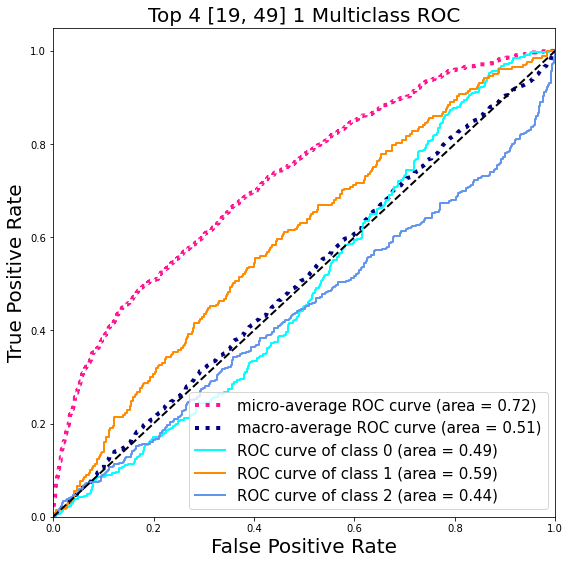

One-vs-One ROC AUC scores:
0.724386 (macro),
0.724386 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.724386 (macro),
0.724386 (weighted by prevalence)


ValueError: multilabel-indicator is not supported

In [9]:
iter = 0
iteration_test = []
BMI_grade = []
ii = 0
# top_count = 4
sup = "_auto_SMOTE_relu"
PATH = "Multiclass_ANN_194979" + sup
import os
os.makedirs(PATH,exist_ok=True)
for top_count in [4,5,6,7,8]:
    print_list = []
    ct = 0
    for ii in [1,2]: # sex
        data = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
        data2 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
        data3 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
        data4 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)
        
        gender = data['sex']
        gender2 = data2['sex']
        gender3 = data3['sex']
        gender4 = data4['sex']
        
        age_list = [[19, 49], [49, 79]]
        for age in range(len(age_list)): 
            
            data_copy = data[(data['age']>=age_list[age][0]) & (data['age']<age_list[age][1])].copy()
            data2_copy = data2[(data2['age']>=age_list[age][0]) & (data2['age']<age_list[age][1])].copy()
            data3_copy = data3[(data3['age']>=age_list[age][0]) & (data3['age']<age_list[age][1])].copy()
            data4_copy = data4[(data4['age']>=age_list[age][0]) & (data4['age']<age_list[age][1])].copy()
            
            sex = [ii]
            data_copy = data_copy.loc[gender.isin(sex)]
            data2_copy = data2_copy.loc[gender2.isin(sex)]
            data3_copy = data3_copy.loc[gender3.isin(sex)]
            data4_copy = data4_copy.loc[gender4.isin(sex)]
            
            Feature_Selection = pd.read_csv('RFC_Feature_Selection/RFC_feature_selection_Multiclass_OVERSAMPLING_194979.csv', index_col = 0)
            filtering = Feature_Selection[(Feature_Selection['gender'] == ii) & (Feature_Selection['age'] == str(age_list[age]))]
            column_feature = ['HE_BMI'] + list(filtering.index[0:top_count])
            
            
            data_select = data_copy[column_feature].copy()
            data_select2 = data2_copy[column_feature].copy()
            data_select3 = data3_copy[column_feature].copy()
            data_select4 = data4_copy[column_feature].copy()
            for i in range(len(column_feature)):
                BMI_grade.append([])
                ## 숫자로 바꿔주는 코드임.
                data_select[column_feature[i]] = pd.to_numeric(data_select[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select2[column_feature[i]] = pd.to_numeric(data_select2[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select3[column_feature[i]] = pd.to_numeric(data_select3[column_feature[i]], errors='coerce').astype(float).round(2)
                data_select4[column_feature[i]] = pd.to_numeric(data_select4[column_feature[i]], errors='coerce').astype(float).round(2)            #print(len(df)) #16000개
                

            df1 = data_select[column_feature]
            df2 = data_select2[column_feature]
            df3 = data_select3[column_feature]
            df4 = data_select4[column_feature]
            
            df = pd.concat([df1, df2, df3, df4], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
            df = df.dropna(how = 'any')
            df = df.sort_values(by = 'HE_BMI')
            for i in range(len(column_feature)):
                ### 8,9제거
                if column_feature[i] in list999:
                    df.drop(df[(df[column_feature[i]] == 888) | (df[column_feature[i]] == 999)].index, inplace = True)
                elif column_feature[i] in list88:
                    df.drop(df[(df[column_feature[i]] == 88) | (df[column_feature[i]] == 99)].index, inplace = True)
                else:
                    df.drop(df[(df[column_feature[i]] == 8) | (df[column_feature[i]] == 9)].index, inplace = True)
                    
            BMI_tmp = df['HE_BMI']
            for k in range(len(df)):
                # print(i+cl*(ii-1)+len(age_list)*(age))
                if BMI_tmp.iloc[k] < 23:
                    BMI_grade[iter].append(0)
                elif 23 <= BMI_tmp.iloc[k] < 25:
                    BMI_grade[iter].append(1)
                elif 25 <= BMI_tmp.iloc[k]:
                    BMI_grade[iter].append(2)
            tree_data = df.drop(['HE_BMI'],axis = 1)
            
            
            iteration_test.append([iter,ct])
            if tree_data.empty == False:
                #########################################################
                # data normalizaion
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(tree_data)
                tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
                tree_data['BMI_grade'] = BMI_grade[iter]
                
                # from sklearn.preprocessing import label_binarize
                # y = label_binarize(y, classes=[0, 1, 2])
                # n_classes = y.shape[1]
                
                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                # y = y.squeeze()
                
                y = label_binarize(y, classes=[0, 1, 2])
                n_classes = y.shape[1]

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


                # #######################
                # ###### MANUALLY #######
                # #######################
                
                # from collections import Counter
                # cnt_list = []
                # for i2 in range(len(y_train)):
                #     cnt_list.append(np.where(1 == y_train[i2])[0][0])
                # cnt2 = cnt_list.count(2)
                # cnt1 = cnt_list.count(1)
                # cnt0 = cnt_list.count(0)
                
                # cnt_max = max(cnt0,cnt1,cnt2)
                
                # dsas = pd.DataFrame({'0' : np.zeros(len(y_train)), '1' : np.zeros(len(y_train)), '2' : np.zeros(len(y_train))})
                # dsas[['0', '1', '2']] = y_train
                # dsas = dsas.set_index(X_train.index)
                # train_ = pd.concat([X_train, dsas], axis=1)
              
                # n_resampl_0 = cnt_max - cnt0
                # if n_resampl_0 != 0:
                #     local = train_.loc[(train_['0']==1)] #0인 갯수가 부족하니까 그것들을 추출
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_0)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_1 = cnt_max - cnt1
                # if n_resampl_1 != 0:
                #     local = train_.loc[(train_['1']==1)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_1)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # n_resampl_2 = cnt_max - cnt2
                # if n_resampl_2 != 0:
                #     local = train_.loc[(train_['2']==1)]
                #     idx = local.index.values # 추출한 것의 index
                #     select_list = [random.choice(idx) for i in range(n_resampl_2)] #랜덤으로 추출된 idx들 모음
                #     tree_data_2 = train_.loc[select_list]
                #     train_ = pd.concat([train_,tree_data_2], ignore_index=True)
                
                # X_train = train_.iloc[:,:-3]
                # y_train = train_.iloc[:,-3:]
                
                # y_train = y_train.values.tolist()
                # y_train = np.array(y_train)

                
                ###############
                ### SMOTE #####
                ###############
                
                sm = SMOTE(random_state=42)
                X_train, y_train = sm.fit_resample(X_train, y_train)
                
                cnt_list = []
                for i2 in range(len(y_train)):
                    cnt_list.append(np.where(1 == y_train[i2])[0][0])
                cnt2 = cnt_list.count(2)
                cnt1 = cnt_list.count(1)
                cnt0 = cnt_list.count(0)
                print('after augmentation')
                print(cnt0, cnt1, cnt2)
                print('------------------')
                
                ##########################################################
                
                ### Neural Network 구성
                clf1 = MLPClassifier(random_state=1, max_iter=10000, activation='relu',hidden_layer_sizes=[100, 100])
                clf1.fit(X_train,y_train)
                
                parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1]}
                grid_dtree1 = GridSearchCV(clf1,param_grid=parameters,cv=3,refit=True)
                grid_dtree1.fit(X_train,y_train)
                best_param1 = list(grid_dtree1.best_params_.values())
                
                clf = MLPClassifier(random_state=1, max_iter=10000, activation='relu',hidden_layer_sizes=[100, 100],alpha= best_param1[0])
                clf.fit(X_train,y_train)    
                
                y_pred = clf.predict(X_test) 
                r_score = recall_score(y_test, y_pred, average = 'weighted')
                p_score = precision_score(y_test, y_pred, average = 'weighted')
                f_score = f1_score(y_test, y_pred, average = 'weighted')
                accuracy = clf.score(X_test,y_test)#, average = None)
                
                
                print(r_score)
                print(p_score)
                print(f_score)
                print(accuracy)
                
                print_list.append([])
                print_list[ct].append(str(sex))
                print_list[ct].append(str(age_list[age]))
                # print_list[ct].append(str(print_name[i]) + "th_group")
                print_list[ct].append(str(column_feature))
                print_list[ct].append(str(cnt0))
                print_list[ct].append(str(cnt1))
                print_list[ct].append(str(cnt2))
                
                # print_list[ct].append(str(train_data_size))
                # print_list[ct].append(str(test_data_size))
                
                # print_list[ct].append(TP)
                # print_list[ct].append(FP)
                # print_list[ct].append(TN)
                # print_list[ct].append(FN)
                print_list[ct].append(np.round(accuracy,3))
                print_list[ct].append(np.round(r_score,3))
                print_list[ct].append(np.round(p_score,3))
                print_list[ct].append(np.round(f_score,3))
                
                from sklearn.metrics import auc
                # Compute ROC curve and ROC area for each class
                fpr = dict()
                tpr = dict()
                roc_auc = dict()
                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], clf.predict_proba(X_test)[:, 1])
                    roc_auc[i] = auc(fpr[i], tpr[i])
                
                # Compute micro-average ROC curve and ROC area
                fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), clf.predict_proba(X_test).ravel())
                roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

                # plt.figure()
                lw = 2

                
                # First aggregate all false positive rates
                all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

                # Then interpolate all ROC curves at this points
                mean_tpr = np.zeros_like(all_fpr)
                for i in range(n_classes):
                    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

                # Finally average it and compute AUC
                mean_tpr /= n_classes

                fpr["macro"] = all_fpr
                tpr["macro"] = mean_tpr
                roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

                # Plot all ROC curves
                plt.figure(figsize=(9,9))
                plt.plot(
                    fpr["micro"],
                    tpr["micro"],
                    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
                    color="deeppink",
                    linestyle=":",
                    linewidth=4,
                )

                plt.plot(
                    fpr["macro"],
                    tpr["macro"],
                    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
                    color="navy",
                    linestyle=":",
                    linewidth=4,
                )

                from itertools import cycle
                colors = cycle(["aqua", "darkorange", "cornflowerblue"])
                for i, color in zip(range(n_classes), colors):
                    plt.plot(
                        fpr[i],
                        tpr[i],
                        color=color,
                        lw=lw,
                        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
                    )

                plt.plot([0, 1], [0, 1], "k--", lw=lw)
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel("False Positive Rate", fontsize=20)
                plt.ylabel("True Positive Rate", fontsize=20)
                plt.title("Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' Multiclass ROC', fontsize=20)
                plt.legend(loc="lower right", fontsize=15)
                plt.savefig(PATH + "/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' ROC-CURVE.png')
                plt.show()
                
                y_prob = clf.predict_proba(X_test).ravel()
                macro_roc_auc_ovo = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovo", average="macro")
                weighted_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="weighted"
                )
                micro_roc_auc_ovo = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovo", average="micro"
                )
                macro_roc_auc_ovr = roc_auc_score(y_test.ravel(), y_prob, multi_class="ovr", average="macro")
                weighted_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="weighted"
                )
                micro_roc_auc_ovr = roc_auc_score(
                    y_test.ravel(), y_prob, multi_class="ovr", average="micro"
                )
                print(
                    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
                )
                print(
                    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
                    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
                )
                
                print_list[ct].append(np.round(macro_roc_auc_ovo,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovo,3))
                print_list[ct].append(np.round(macro_roc_auc_ovr,3))
                print_list[ct].append(np.round(micro_roc_auc_ovo,3))
                print_list[ct].append(np.round(weighted_roc_auc_ovr,3))
                
                from sklearn.model_selection import cross_val_predict
                from sklearn.metrics import confusion_matrix
                y_train_pred = cross_val_predict(clf, X_train, y_train)
                conf_mx = confusion_matrix(y_train, y_train_pred)
                plt.matshow(conf_mx, cmap=plt.cm.gray)
                plt.savefig(PATH +"/Top " + str(top_count)
                            + " " + str(age_list[age])
                            + " " + str(ii) + ' confusion-matrix' + sup + '.png')
                
                
                ct += 1
                
            iter += 1
            
            
    pl = pd.DataFrame(print_list,
                        columns=['gender',
                                '<= age <',
                                # "group",
                                "list",
                                'Number Of 0',
                                'Number of 1',
                                'Number of 2',
                                'accuracy score',
                                'recall score',
                                'precision score',
                                'f1 score',
                                'OVO AUC macro',
                                'OVO AUC micro',
                                'OVO AUC weighted',
                                'OVR AUC macro',
                                'OVR AUC micro',
                                'OVR AUC weighted'])

    pl.to_csv(PATH + '/top ' + str(top_count) + ' ANN_혈액검사 데이터' + sup + '.csv', index=False)